# 读取图像

## 倒入相关包

In [1]:
from  skimage import io
from matplotlib import pyplot as plt
from torchvision import utils
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import os 
import torch
from PIL import Image


In [2]:
file_path =  ["/home/medicaldata/WTJData/xunfei/苹果病害图像识别挑战赛公开数据","/home/medicaldata/WTJData/xunfei/高分辨率遥感影像建筑物变化检测挑战赛公开数据-初赛"
]

### 苹果疾病说明

d1 黑斑病
d2 褐斑病
d3 青枯叶斑病
d4 灰斑病
d5 健康
d6 花叶病毒病
d7 白粉病
d8 锈病
d9 疮痂病

### 展示数据，每种疾病展示一张图片

In [3]:
ans_list = []
img_annotation = []
for disease in os.listdir(os.path.join(file_path[0],"train")):
    if disease.endswith("txt"):
        continue
    for img in os.listdir(os.path.join(file_path[0],"train",disease)):
        img_annotation.append(disease+"" + img)
        ans_list.append(read_image(os.path.join(file_path[0],"train",disease,img)))  
        break
# 这里不能直接使用make_grid，因为图像的尺寸不一样，需要先resize
# grid = make_grid(ans_list)
# show(grid)

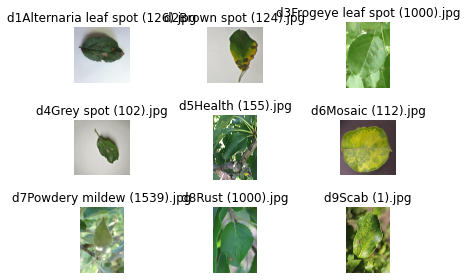

In [4]:
# 创建一个3x3的子图布局
fig, axes = plt.subplots(3, 3)

# 循环遍历每个子图，并在相应位置显示图片
for i, ax in enumerate(axes.flat):
    ax.imshow(torch.transpose(ans_list[i],0,2))
    ax.title.set_text(img_annotation[i])
    ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

### 思路与感觉

首先图像的色彩对分类任务非常重要，不能转为灰度图像，否则会丢失很多信息。  
其次，数据集中图像尺寸也不一致，需要注意，无论是resize还是设计接受任意大小的网络，都需要注意图像尺寸的问题。  
最后，需要注意数据集的平衡性。

## 高分辨率遥感影像建筑物变化检测挑战赛公开数据

In [6]:
ans_list = []
img_annotation = []
for image_type in os.listdir(os.path.join(file_path[1],"初赛训练集")):
    for img in os.listdir(os.path.join(file_path[1],"初赛训练集",image_type)):
        img_annotation.append(image_type+" "+img)
        img= Image.open(os.path.join(file_path[1],"初赛训练集",image_type,img))
        ans_list.append(img)  
        break

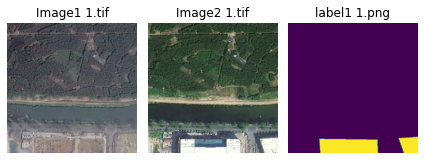

In [7]:
# 创建一个3x3的子图布局
fig, axes = plt.subplots(1, 3)

# 循环遍历每个子图，并在相应位置显示图片
for i, ax in enumerate(axes.flat):
    ax.imshow(ans_list[i])
    ax.title.set_text(img_annotation[i])
    ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

### 思路与感觉

要么做图像直方图匹配，让色彩一致，要么转化为灰度图像  
最基本的数据增强就是交换Image1 和Image2的序列位置，实现建筑物的增加与减少  